In [1]:
import os
import os.path

import pandas as pd

import numpy as np
from numpy import asarray

import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras
from keras import backend as Kbe
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop
from keras.constraints import maxnorm
from keras.applications.resnet50 import ResNet50

import cv2 

import PIL
from PIL import Image
from PIL import ImageMath
from PIL import ImageTk

import random
import sys
import struct

import argparse
import time

import glob

Using TensorFlow backend.


In [2]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [3]:
DAtADIR ='C:\Saurav\Data Science\CSIS 4260\Final_Project'

In [4]:
img_cv = 'covid/'
img_nm = 'normal/'
img_os_cv = os.listdir(img_cv)
img_os_nm = os.listdir(img_nm)

img_Samples = len(img_os_cv) + len(img_os_nm)
print(' Covid Samples:', len(img_os_cv))
print(' Normal Samples:', len(img_os_nm))
print(' Total Training Samples:', img_Samples)

 Covid Samples: 406
 Normal Samples: 3073
 Total Training Samples: 3479


In [5]:
imagescv = [cv2.imread(file) for file in glob.glob(os.path.join(DAtADIR, 'covid', '*.jpg'))]

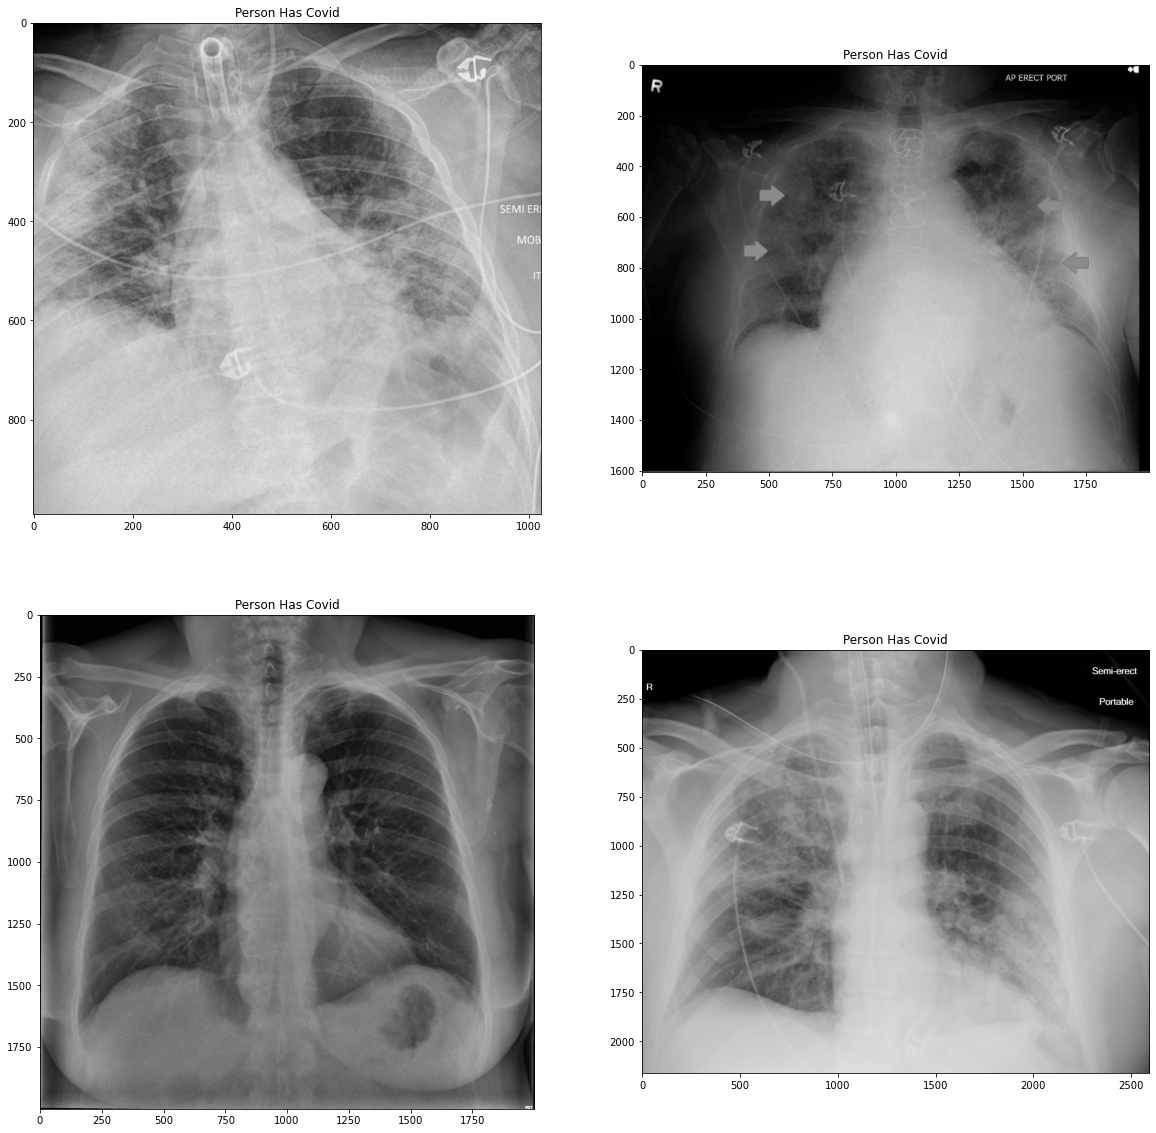

In [6]:
fig=plt.figure(figsize=(20, 20))
columns = 2
rows = 2
for i in range(1, columns*rows +1):
    img = imagescv[i]
    fig.add_subplot(rows, columns, i)
    plt.title('Person Has Covid')
    plt.imshow(img)
plt.show()

In [7]:
imagesnm = [plt.imread(file2) for file2 in glob.glob(os.path.join(DAtADIR, 'normal', '*.jpg'))]

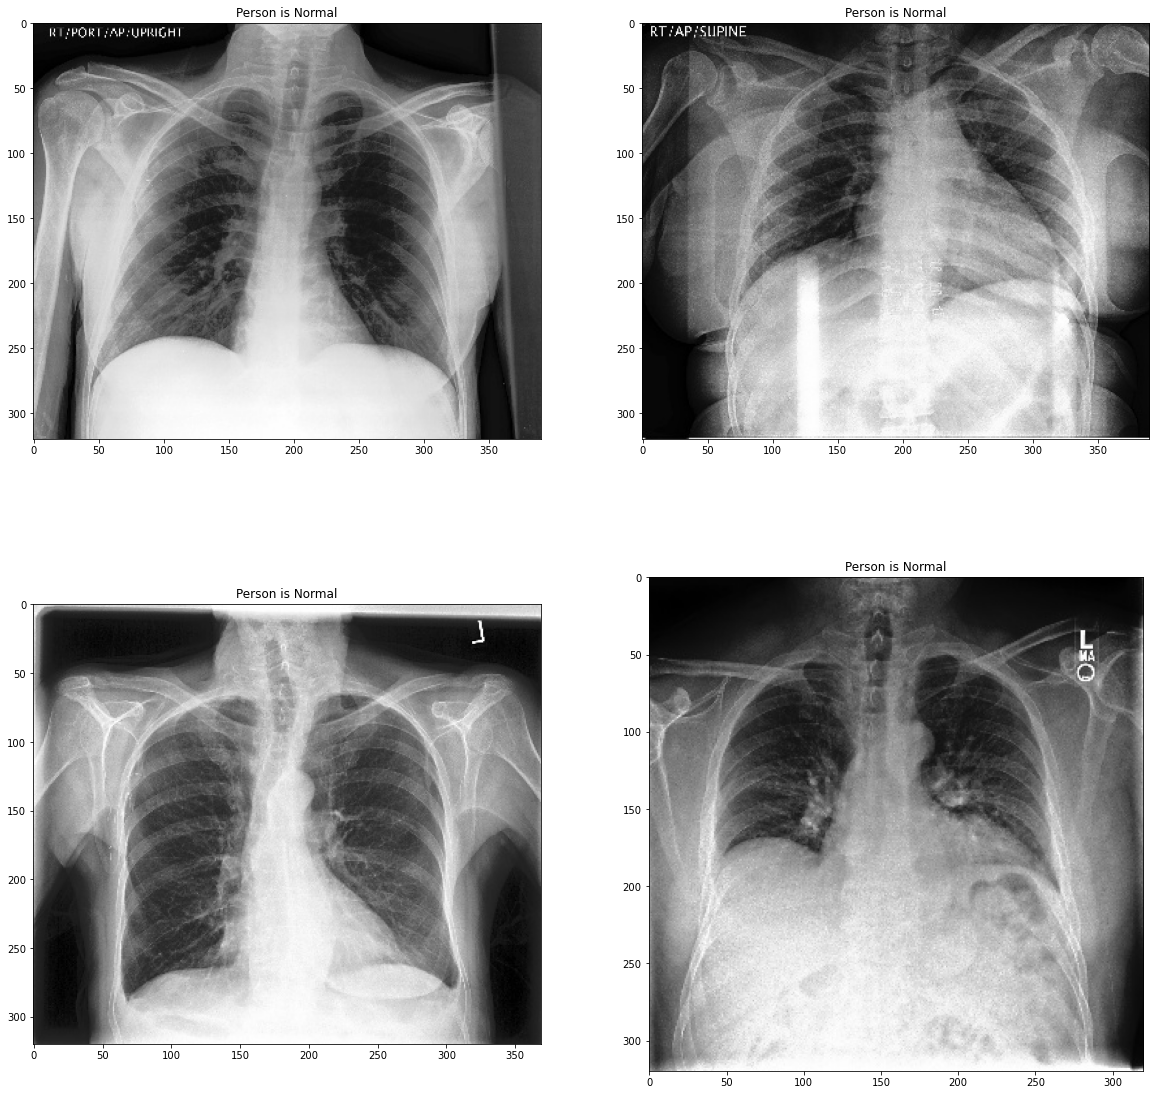

In [8]:
fig=plt.figure(figsize=(20, 20))
columns = 2
rows = 2
for i in range(1, columns*rows +1):
    img = imagesnm[i]
    fig.add_subplot(rows, columns, i)
    plt.title('Person is Normal')
    plt.imshow(img)
plt.show()

In [9]:
categories =["covid","normal"]

In [10]:
trainingdata=[]

def createtrrainingdata():
    for cate in categories:
        path= os.path.join(DAtADIR,cate)
        class_num =  categories.index(cate)
        for img in os.listdir(path):
            rawimage= cv2.imread(os.path.join(path,img)).flatten()
            resizeimage= cv2.resize(rawimage,(200,200))
            trainingdata.append([resizeimage,class_num])

In [11]:
createtrrainingdata()

In [12]:
trainingdata[0]

[array([[144, 144, 144, ..., 144, 144, 144],
        [  2,   2,   2, ...,   2,   2,   2],
        [251, 251, 251, ..., 251, 251, 251],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [241, 241, 241, ..., 241, 241, 241],
        [196, 196, 196, ..., 196, 196, 196]], dtype=uint8),
 0]

In [13]:
x = []
y = []

for features,label in trainingdata:
    x.append(features)
    y.append(label)

# X = pd.DataFrame(x, columns= ['Features'])
# Y = pd.DataFrame(y,columns= ['Label'])

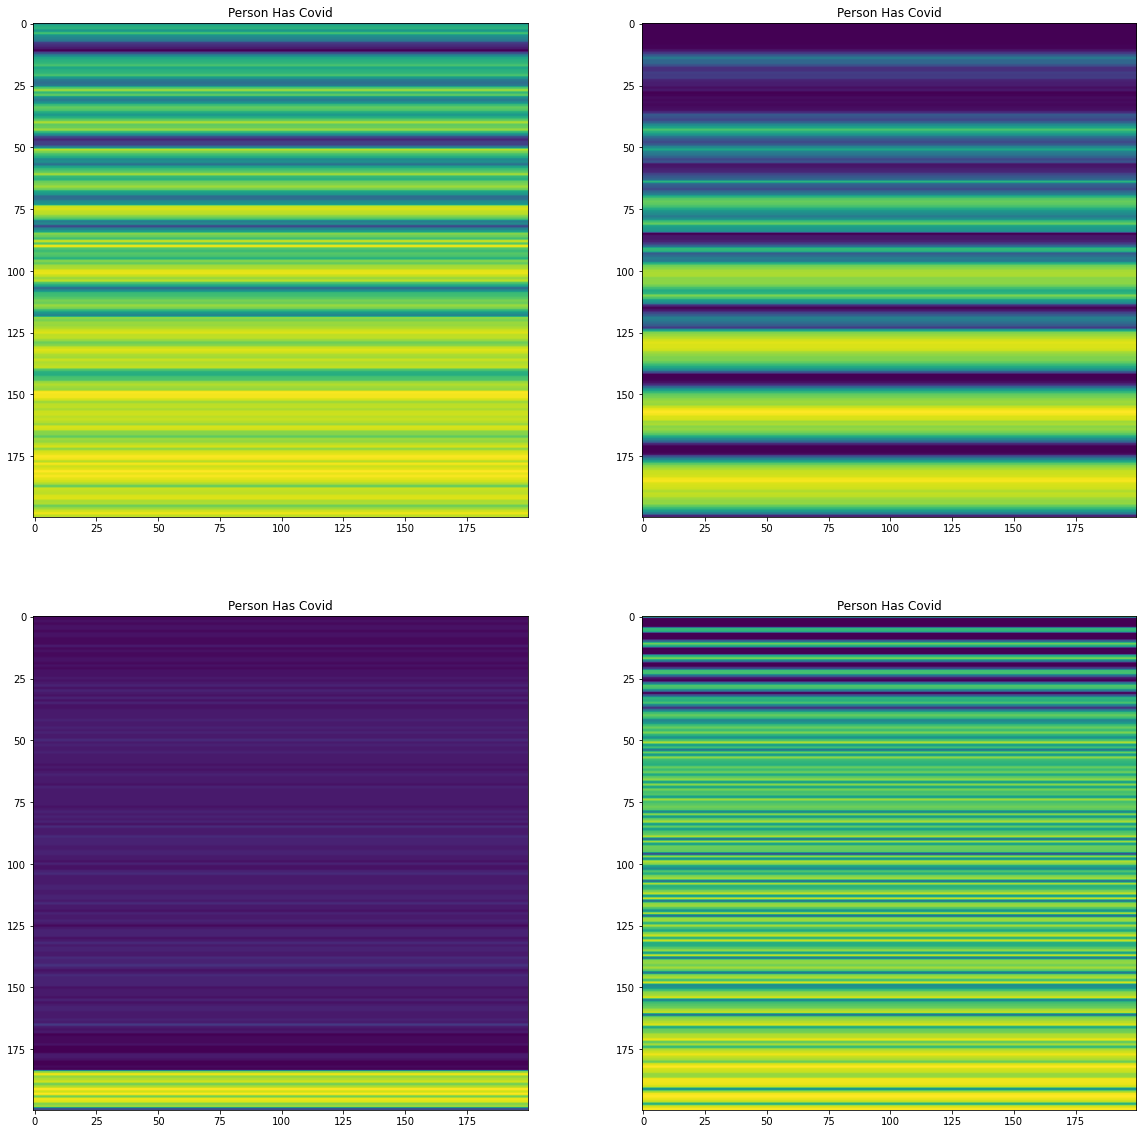

In [15]:
fig=plt.figure(figsize=(20, 20))
columns = 2
rows = 2
for i in range(1, columns*rows +1):
    img = x[i]
    fig.add_subplot(rows, columns, i)
    if y[i] == 0:
        plt.title('Person Has Covid')
        plt.imshow(img)
    else:
        plt.title('Person is Normal')
        plt.imshow(img)
plt.show()

In [16]:
xa = np.array(x).reshape(-1,200,200,1)
ya = np.array(y)

In [18]:
X_train, X_test = train_test_split(xa,random_state=0)
y_train,y_test =train_test_split(ya,random_state=0)

In [19]:
X_train.shape

(2609, 200, 200, 1)

In [23]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape = xa.shape[1:]))

model.add(Activation("relu"))


model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

#### Hiddern laYERS
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

##### Define nurons 
model.add(Dense(2))
model.add(Activation("softmax"))

### Compiling the model
print("Compiling the Model")

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

history =model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=50, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=2)
print("CNN Error: {}%".format(100 - scores[1] * 100))

Compiling the Model
Train on 2609 samples, validate on 870 samples
Epoch 1/50
 - 15s - loss: 20.2274 - accuracy: 0.7578 - val_loss: 0.3214 - val_accuracy: 0.8851
Epoch 2/50
 - 15s - loss: 0.2905 - accuracy: 0.8839 - val_loss: 0.2124 - val_accuracy: 0.9172
Epoch 3/50
 - 15s - loss: 0.1983 - accuracy: 0.9076 - val_loss: 0.1872 - val_accuracy: 0.9184
Epoch 4/50
 - 15s - loss: 0.1761 - accuracy: 0.9199 - val_loss: 0.1703 - val_accuracy: 0.9287
Epoch 5/50
 - 15s - loss: 0.1645 - accuracy: 0.9341 - val_loss: 0.2015 - val_accuracy: 0.9195
Epoch 6/50
 - 15s - loss: 0.1790 - accuracy: 0.9222 - val_loss: 0.1880 - val_accuracy: 0.9276
Epoch 7/50
 - 15s - loss: 0.1525 - accuracy: 0.9360 - val_loss: 0.1784 - val_accuracy: 0.9230
Epoch 8/50
 - 15s - loss: 0.1568 - accuracy: 0.9241 - val_loss: 0.2175 - val_accuracy: 0.9253
Epoch 9/50
 - 15s - loss: 0.1547 - accuracy: 0.9371 - val_loss: 0.1803 - val_accuracy: 0.9345
Epoch 10/50
 - 15s - loss: 0.1418 - accuracy: 0.9375 - val_loss: 0.2230 - val_accuracy

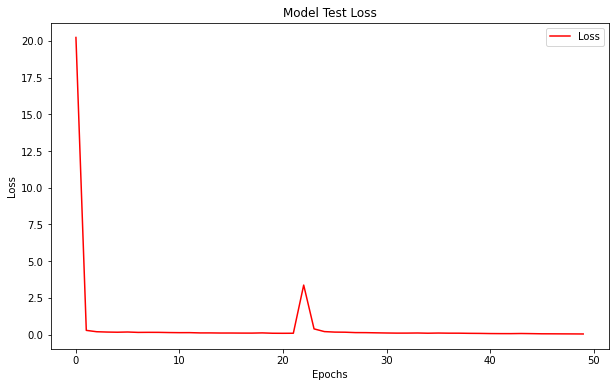

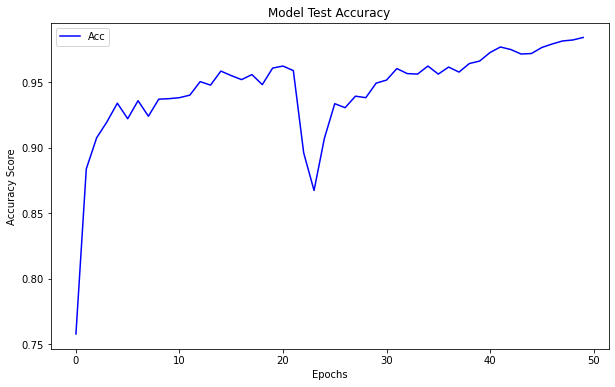

In [24]:
def show_loss():
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], 
             color='red', 
             label='Loss')
    plt.title("Model Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
def show_acc_epochs():
    plt.figure(figsize=(10,6))
    plt.plot(history.history['accuracy'],
             color='blue',
             label='Acc')
    plt.title("Model Test Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy Score")
    plt.legend()
    plt.show()
    
    
show_loss()
show_acc_epochs()

In [28]:
img = X_test[15]

img = img.reshape(1,200, 200, 1) 

predictions = model.predict(img)

# Predict the class
result = model.predict_classes(img)

if result == 0:
    print('Person is COVID Positive')
else:
    print('Person is Normal')

Person is COVID Positive
